### **Access the srtm dem data and tandem data. And projected the data to utm projection (!!to do).**

In [37]:
import os
os.chdir('..')
import config
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff
from utils.get_dem import get_dem
from utils.geotif_io import readTiff
from utils.imgShow import imgShow
from utils.lay_stack import lay_stack


### **Download SRTM DEM**
#### This data is acquired at 2000.

In [28]:
## configuration
region_bounds = (80.118, 34.907, 81.941, 35.852)     # rgi13_05
path_srtm = config.root_proj + '/data/dem_data/srtm-c/SRTMGL1_E_wkunlun.tif'

In [4]:
srtm_dem = get_dem(demtype='SRTMGL1_E', bounds=region_bounds, \
                        apikey='7f97d1b49489d7c0e346b085772aef3c', path_out=path_srtm)


https://portal.opentopography.org/API/globaldem?demtype=SRTMGL1_E&west=80.118&south=34.907&east=81.941&north=35.852&outputFormat=GTiff&API_Key=7f97d1b49489d7c0e346b085772aef3c
DEM data have been downloaded!


#### Reprojection

In [29]:
### 1. wgs84 to utm projection
path_srtm_utm = config.root_proj + '/data/dem_data/srtm-c/SRTMGL1_E_wkunlun_utm.tif'
command_line = 'gdalwarp  -overwrite -s_srs EPSG:4326 -t_srs EPSG:32644 -tr 30 30 -r cubic -co COMPRESS=LZW -co TILED=YES ' +\
                path_srtm + ' ' + path_srtm_utm
print(os.popen(command_line).read())




Creating output file that is 5552P x 3507L.
Processing /Users/luo/OneDrive/GitHub/Glacier-in-RGI1305/data/dem_data/srtm-c/SRTMGL1_E_wkunlun.tif [1/1] : 0Using internal nodata values (e.g. -32768) for image /Users/luo/OneDrive/GitHub/Glacier-in-RGI1305/data/dem_data/srtm-c/SRTMGL1_E_wkunlun.tif.
Copying nodata values from source /Users/luo/OneDrive/GitHub/Glacier-in-RGI1305/data/dem_data/srtm-c/SRTMGL1_E_wkunlun.tif to destination /Users/luo/OneDrive/GitHub/Glacier-in-RGI1305/data/dem_data/srtm-c/SRTMGL1_E_wkunlun_utm.tif.
...10...20...30...40...50...60...70...80...90...100 - done.



dem_info: {'geoextent': (80.11791666670115, 81.94097222225695, 34.90708333333, 35.85208333333013), 'geotrans': (80.11791666670115, 0.00027777777777781464, 0.0, 35.85208333333013, 0.0, -0.00027777777777781464), 'geosrs': '4326', 'row': 3402, 'col': 6563, 'bands': 1}
dem_utm_info: {'geoextent': (419416.44565371965, 585976.4456537196, 3862741.200990109, 3967951.200990109), 'geotrans': (419416.44565371965, 30.0, 0.0, 3967951.200990109, 0.0, -30.0), 'geosrs': '32644', 'row': 3507, 'col': 5552, 'bands': 1}


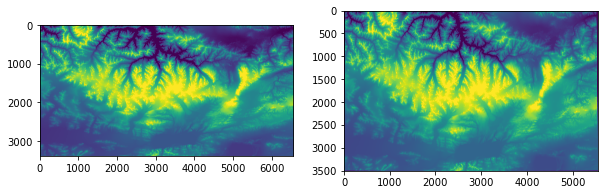

In [32]:
dem, dem_info = readTiff(path_srtm)
dem_utm, dem_utm_info = readTiff(path_srtm_utm)
print('dem_info:',dem_info); print('dem_utm_info:', dem_utm_info)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); imgShow(dem)
plt.subplot(1,2,2); imgShow(dem_utm)


### **Download TanDEM-X 90 DEM**
#### This data is acquired at ~2012.


In [4]:
### It is convenient to download from website directly.
### website: https://download.geoservice.dlr.de/TDM90/#download
### or: 
### 1) download the tdm90-url-list.txt and 2)
### !curl $(printf ' -O %s' $(<TDM90-url-list.txt)) -u 'xinluo_xin@163.com:XmRLpX5y5fB3A_j'


zsh:1: no such file or directory: TDM90-url-list.txt
curl: no URL specified!
curl: try 'curl --help' or 'curl --manual' for more information


#### Reprojection for tandem data

In [33]:
path_tandem = config.root_proj + '/data/dem_data/tandem-x/tandem_wkunlun.tif'
path_tandem_utm = config.root_proj + '/data/dem_data/tandem-x/tandem_wkunlun_utm.tif'
command_line = 'gdalwarp  -overwrite -s_srs EPSG:4979 -t_srs EPSG:32644 -tr 30 30 -r cubic -co COMPRESS=LZW -co TILED=YES ' +\
                path_tandem + ' ' + path_tandem_utm
print(os.popen(command_line).read())


Creating output file that is 5550P x 3507L.
Processing /Users/luo/OneDrive/GitHub/Glacier-in-RGI1305/data/dem_data/tandem-x/tandem_wkunlun.tif [1/1] : 0...10...20...30...40...50...60...70...80...90...100 - done.



tandem_info: {'geoextent': (80.118, 81.941, 34.907, 35.852), 'geotrans': (80.118, 0.0008331809872029284, 0.0, 35.852, 0.0, -0.0008333333333333336), 'geosrs': '4979', 'row': 1134, 'col': 2188, 'bands': 1}
tandem_utm_info: {'geoextent': (419423.97743896896, 585923.977438969, 3862731.9820688833, 3967941.9820688833), 'geotrans': (419423.97743896896, 30.0, 0.0, 3967941.9820688833, 0.0, -30.0), 'geosrs': '32644', 'row': 3507, 'col': 5550, 'bands': 1}


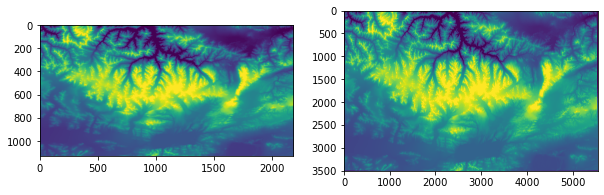

In [36]:
tandem, tandem_info = readTiff(path_tandem)
tandem_utm, tandem_utm_info = readTiff(path_tandem_utm)
print('tandem_info:',tandem_info); print('tandem_utm_info:', tandem_utm_info)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1); imgShow(tandem)
plt.subplot(1,2,2); imgShow(tandem_utm)


### Layer stacking for the srtm dem and tandem data

In [41]:
path_laystack =  config.root_proj + '/data/dem_data/srtm_tandem_laystack.tif'
lay_stack(path_imgs=[path_srtm_utm, path_tandem_utm], path_out=path_laystack)


In [55]:
path_img_utm = config.root_proj + '/data/rsimg/l8_kunlun_20200914_utm.tif'
img_utm, img_utm_info = readTiff(path_img_utm)
print(img_utm_info)



{'geoextent': (419403.84614682785, 585963.8461468278, 3862785.3229942983, 3967995.3229942983), 'geotrans': (419403.84614682785, 30.0, 0.0, 3967995.3229942983, 0.0, -30.0), 'geosrs': '32644', 'row': 3507, 'col': 5552, 'bands': 6}


dems_info: {'geoextent': (419416.44565371965, 585976.4456537196, 3862741.200990109, 3967951.200990109), 'geotrans': (419416.44565371965, 30.0, 0.0, 3967951.200990109, 0.0, -30.0), 'geosrs': '32644', 'row': 3507, 'col': 5552, 'bands': 2}


Text(0.5, 1.0, 'L8 image')

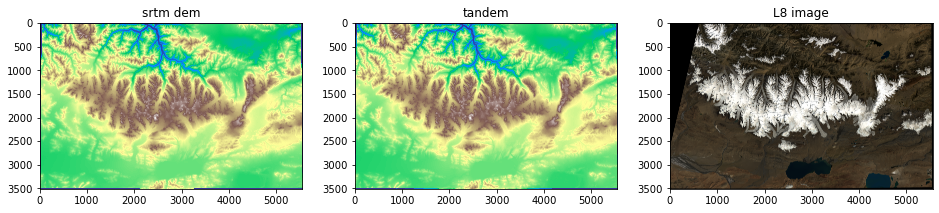

In [57]:
dems, dems_info = readTiff(path_laystack)
print('dems_info:', dems_info)
plt.figure(figsize=(16,5))
plt.subplot(1,3,1); plt.imshow(dems[:,:,0], vmin=4000, vmax=7000, cmap='terrain')
plt.title('srtm dem')
plt.subplot(1,3,2); plt.imshow(dems[:,:,1], vmin=4000, vmax=7000, cmap='terrain')
plt.title('tandem')
plt.subplot(1,3,3); imgShow(img_utm, color_bands=[2,1,0])
plt.title('L8 image')
